# MATM063: Principles of Data Science

## Unassessed Coursework 1

### Question 1: Defining Matricies and Performing Operations

1. Define a four by four matrix A, find its transpose, trace, determinant and inverse.

In [6]:
import numpy as np
#Defining an arbitrary 4x4 Matrix A
A = np.array([[1,2,3,4],[9,4,3,2],[6,6,1,9],[9,8,7,6]])
#Find the transpose, trace, determinant and inverse
A_transpose = A.T
A_trace = np.trace(A)
A_determinant = np.linalg.det(A)
A_inverse = np.linalg.inv(A)
#print results
print(f"The transpose of matrix A is:\n{A_transpose}")
print(f'The trace of matrix A is:',A_trace)
print(f'The determinant of matrix A is:',A_determinant)
print(f"The inverse of matrix A is:\n{A_inverse}")

The transpose of matrix A is:
[[1 9 6 9]
 [2 4 6 8]
 [3 3 1 7]
 [4 2 9 6]]
The trace of matrix A is: 12
The determinant of matrix A is: -520.0
The inverse of matrix A is:
[[ 1.00000000e-01  2.50000000e-01 -6.16790569e-18 -1.50000000e-01]
 [-6.00000000e-01 -4.03846154e-01  7.69230769e-02  4.19230769e-01]
 [ 3.00000000e-01  5.76923077e-02 -1.53846154e-01  1.15384615e-02]
 [ 3.00000000e-01  9.61538462e-02  7.69230769e-02 -1.80769231e-01]]


For this question, I used numpy to create matrix A, then used the linalg function to calculate the matrix's properties. Finally I printed the properties.

2. For the cyclic matrix C, find the smallest value of n such that C**n = I (Identity Matrix 3*3)

In [7]:
#Define cyclic matrix C
C = np.array([[0,0,1],[1,0,0],[0,1,0]])
#Calculating smallest n s.t C^n = I(3x3)
#start n from 1, as any matrix to the power of 0 becomes the identity so this is trivial
n = 1
I = np.identity(3)
while not np.array_equal(np.linalg.matrix_power(C, n), I):
    n += 1

print(f"The smallest value for n to satisfy C^n = I(3x3) is n = {n}")


The smallest value for n to satisfy C^n = I(3x3) is n = 3


For this question I create a while loop that iterates over values of n starting from 1 until the desired equation is satisfied. It then prints the according n that satisfies the equation.

### Question 2: Solving Matrix-vector systems

1. Solve the system of equations

In [8]:
import numpy as np
from sympy import symbols, Eq, solve
#define variables
x, y, z = symbols('x y z')
#define equations
eq1 = Eq(4*x - 5*y + 2*z, 7) 
eq2 = Eq(8*x + 5*y - 4*z, 10) 
eq3 = Eq(3*x - 2*y + z, 5)
#solve equations
solution = solve((eq1, eq2, eq3), (x, y, z))
print(solution) 

{x: 3/2, y: 0, z: 1/2}


In [9]:
x,y,z = 3/2, 0, 1/2 #results taken from above output
print(4*x - 5*y + 2*z == 7)
print(8*x + 5*y - 4*z == 10)
print(3*x - 2*y + z == 5)

True
True
True


For this question, I simply import sympy and define symbols x,y and z. Then I define equations and use the solve() function to solve the equations. I print the solution. Below, I check to see if my results for x,y,z are true by subbing them back into the equations. I yield three true results which means that my values for x,y and z work for all three equations. The system of equations is thus solved.

### Question 3: Solving iteration problems

1. For the given iteration, how many iterations are required for convergence with tol = 10−2, 10−3, 10−4 and 10−5? Do you think that this iteration will converge as
n →∞? (To help understand this iteration, plot the first 100 iterates of the map by plotting the points (n, xn), n = 0, . . . , 100.))

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#I define a function that iterates
def iterate(x0, f, tol, maxit):
    x = x0
    for i in range(maxit):
        x_next = f(x)
        if abs(x_next) < tol:
            return i+1
        x = x_next
    return maxit
#I then define a function
f = lambda x: 4 * x * (1 - x)
#I print results for different tolerances
print(iterate(0.1, f, 10**-2, 100))
print(iterate(0.1, f, 10**-3, 100))
print(iterate(0.1, f, 10**-4, 10000))
print(iterate(0.1, f, 10**-5, 10000))


13
13
363
748


For this question, I simply defined the iterative function, which takes an initial x value, the function it wants to iterate over, a tolerance value which is the cutoff point at which we consider it to be approximately 'converged' and the max iteration value to stop the function from going forever. I then print out the results of 4 different setups.

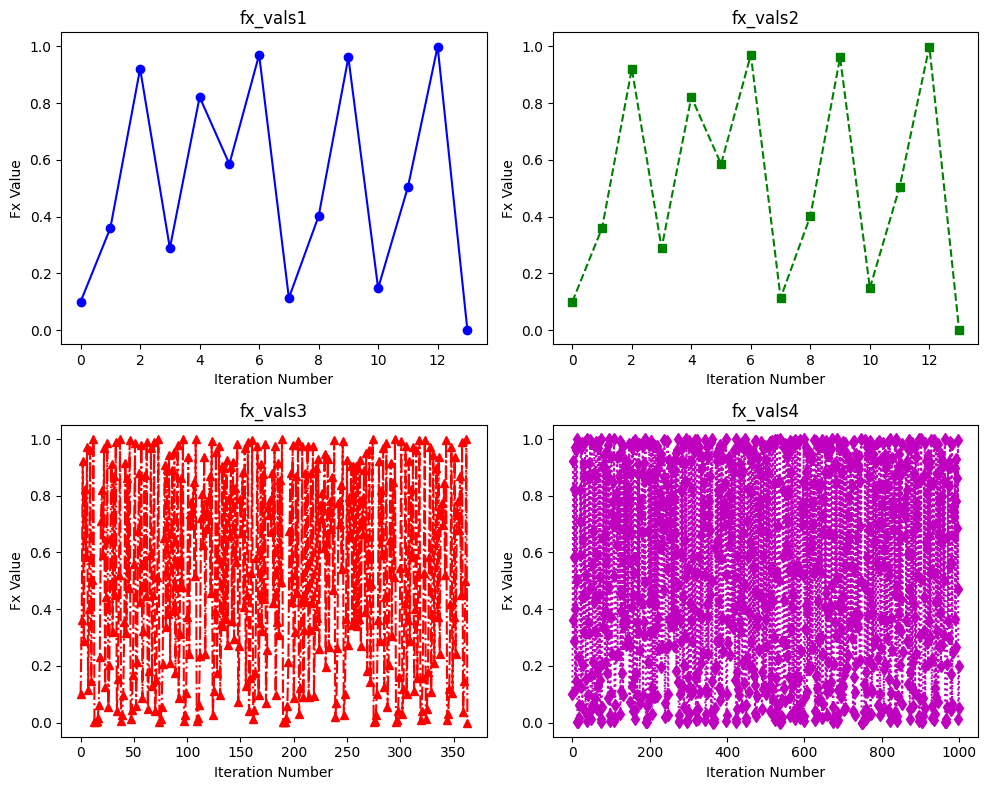

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#defining a graphing function for the iterable equation
def iterate_graph(x0, f, tol, maxit):
    x = x0
    fx_vals = [x]
    for i in range(maxit):
        x_next = f(x)
        fx_vals.append(x_next)
        if abs(x_next) < tol:
            break
        x = x_next
    return fx_vals

#four different tolerance scenarios
fx_vals1 = iterate_graph(0.1, f, 10**(-2), 100)
fx_vals2 = iterate_graph(0.1, f, 10**(-3), 100)
fx_vals3 = iterate_graph(0.1, f, 10**(-4), 400)
fx_vals4 = iterate_graph(0.1, f, 0, 1000)
#setting up n values to be the same size as the fx vals lists.
n1 = np.arange(len(fx_vals1))
n2 = np.arange(len(fx_vals2))
n3 = np.arange(len(fx_vals3))
n4 = np.arange(len(fx_vals4))
#setting up plotting area
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
#plotting each one in a 2 by 2 grid for neatness
axes[0, 0].plot(n1, fx_vals1, marker="o", linestyle="-", color="b")
axes[0, 0].set_title("fx_vals1")
axes[0, 0].set_xlabel("Iteration Number")
axes[0, 0].set_ylabel("Fx Value")

axes[0, 1].plot(n2, fx_vals2, marker="s", linestyle="--", color="g")
axes[0, 1].set_title("fx_vals2")
axes[0, 1].set_xlabel("Iteration Number")
axes[0, 1].set_ylabel("Fx Value")

axes[1, 0].plot(n3, fx_vals3, marker="^", linestyle="-.", color="r")
axes[1, 0].set_title("fx_vals3")
axes[1, 0].set_xlabel("Iteration Number")
axes[1, 0].set_ylabel("Fx Value")

axes[1, 1].plot(n4, fx_vals4, marker="d", linestyle=":", color="m")
axes[1, 1].set_title("fx_vals4")
axes[1, 1].set_xlabel("Iteration Number")
axes[1, 1].set_ylabel("Fx Value")


plt.tight_layout()


plt.show()

#we see results in accordance with previously calculated numbers for convergence

For this function I simply modify the iterative function to add in a list called fx_vals which records each function value. I can use this to then plot below using matplotlib.

It is clear to see that the function will not converge as n --> infinity. The function shows a sporadic jumping between 1 and 0, and has no trend towards 0 for any amount of max iterations. 

### Question 4: Solving equations

1. For the function f(x) = sin**(x) - sin(2x) - 1, show that it changes sign between x = -1 and x = 0. Find a solution of the equation f(x) = 0 between x=-1 and x = 0.

The intersection of the function with the X-axis is at [-0.46364761]


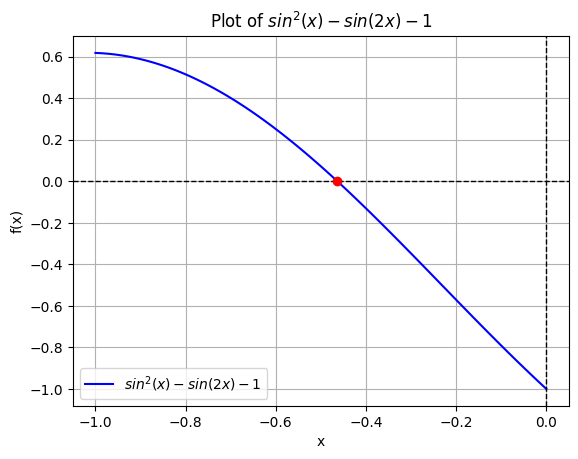

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
# define f(x)
sin_func = lambda x: np.sin(x)**2 - np.sin(2*x) - 1
x_vals = np.linspace(-1, 0, 100)  # 100 points for smooth curve
y_vals = [sin_func(x) for x in x_vals]  # Compute y values

# Plot the function
plt.plot(x_vals, y_vals, label=r"$sin^2(x) - sin(2x) - 1$", color='b')

# Formatting
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add x-axis
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add y-axis
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of $sin^2(x) - sin(2x) - 1$")
plt.legend()
plt.grid()

# fsolve is used to find the value of x that makes f(x) equal to zero.
solution = fsolve(sin_func, -0.1)
plt.scatter(solution, 0, color='red', zorder=3, label="Root")
print(f'The intersection of the function with the X-axis is at', solution)

For this question I simply define the sin function, create x values and y values in a Numpy array and plot. Then I use the fsolve() function to find the solution for f(x) = 0. I do some matplotlib formatting to make it look for visibly obvious.

### Question 5:

1. Calculate the standard correlation coefficient matrix of the housing data set.

In [33]:
#first I have to load in the housing data set
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

# execute these functions:
fetch_housing_data() # fetch the data
housing = load_housing_data()
housing # loading data into workspace

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
#calculate the standard correlation coefficient matrix
housing.drop("ocean_proximity", axis=1, inplace=True) #we drop this as it only contains categories rather than floats so cannot be converted to a matrix
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


For this question this is a standard procedure. I import necessary packages that help take the data from GitHub and convert from a .tgz file to a .cvs file in order to view the 'housing' data. I then print this. Following this, I drop the 'ocean_proximity' attribute as it only contains categories and cannot be calcualatd into a correlation matrix, which is purely numerical. Then I do housing.corr() to work out the correlation matrix.

2. Assume your quantity of interest is the median_income. Provide the correlation coefficient with respect to this attribute and sort them in ascending
order.

In [36]:
corr_matrix['median_income'].sort_values(ascending=True)

housing_median_age   -0.119034
latitude             -0.079809
longitude            -0.015176
total_bedrooms       -0.007723
population            0.004834
households            0.013033
total_rooms           0.198050
median_house_value    0.688075
median_income         1.000000
Name: median_income, dtype: float64

I simply call on one column of the correlation matrix to view just median income attributes.

### Question 6:

In the lecture notes, we defined the following attribute combinations.

In [3]:
#now I have to re-load in the housing data set as each question is a different python file
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

# execute these functions:
fetch_housing_data() # fetch the data
housing = load_housing_data() # loading data into workspace

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

1. Plot the scatter matrix using the following attributes, also plot a scatter plot for just attributes median_house_value over rooms_per_household.

<Axes: xlabel='median_house_value', ylabel='rooms_per_household'>

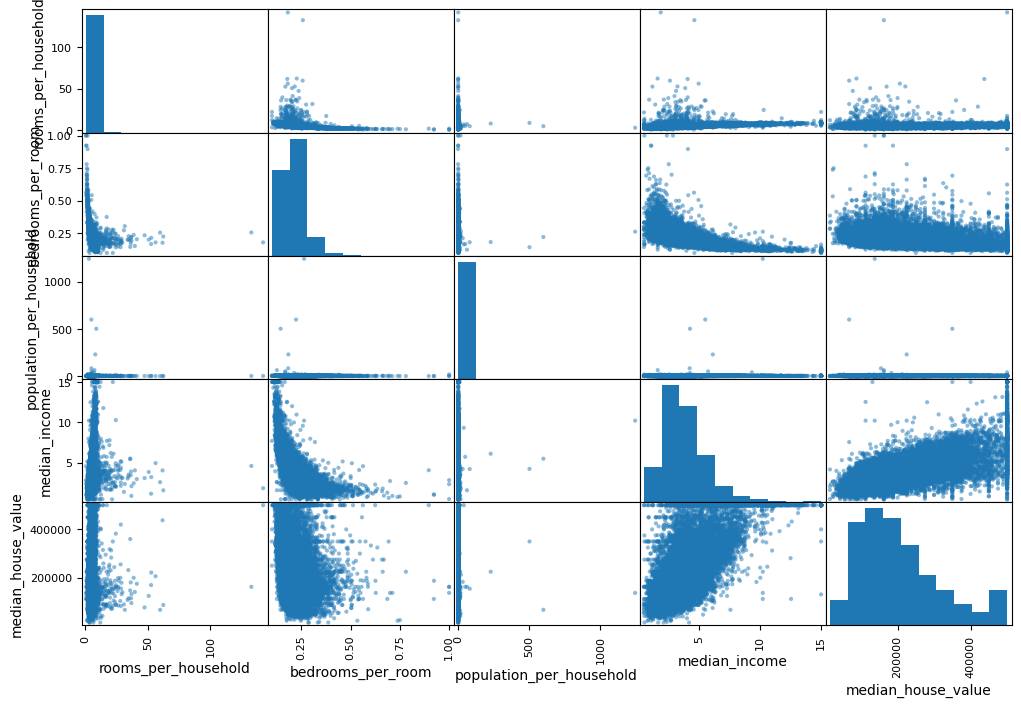

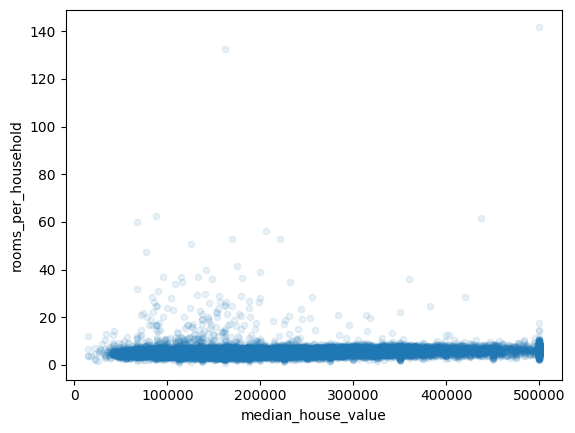

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["rooms_per_household", "bedrooms_per_room", "population_per_household", "median_income", "median_house_value"]

scatter_matrix(housing[attributes], figsize=(12, 8)) # LEFT

housing.plot(kind="scatter", x="median_house_value", y="rooms_per_household", alpha=0.1) # RIGHT

For this question I simply use pandas.plotting to plot the scatter matrix for all requested attributes, then I also plot a scatter plot for two of the requested attributes.

2. As comparison, print out the standard correlation coefficients relative to median_house_value (sort them as you like). Discuss: (i) is the
negative correlation of bedrooms_per_room to median_house_value visible in the scatter matrix; and (ii) do we see a positive correlation of
median_house_value and rooms_per_household? What problem could impact our capability to infer from the picture such correlation?


In [4]:
#calculate the standard correlation coefficient matrix
housing.drop("ocean_proximity", axis=1, inplace=True) #we drop this as it only contains categories rather than floats so cannot be converted to a matrix
corr_matrix = housing.corr()
corr_matrix
corr_matrix["median_house_value"].sort_values(ascending=True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

(i) In terms of median house value, it is definitely the most negative sloped correlation (-0.26 approx). What's more, the results are quite spread out showing weak correlation between the two attributes. But yes it is indeed visible.

(ii) It is slightly positive at a value of 0.15 approx. Unfortunately, because the scale of the graph is set from the lowest to the highest value, we see a 'zoomed-out' picture which doesn't allow us to properly view the bulk of results. This means that we are unable to see a positive gradient and almost see the graph as a straight line. This affects our ability to be able to determine that there is in fact a positive correlation. Luckily, the corr_matrix function returns the true correlation values. 

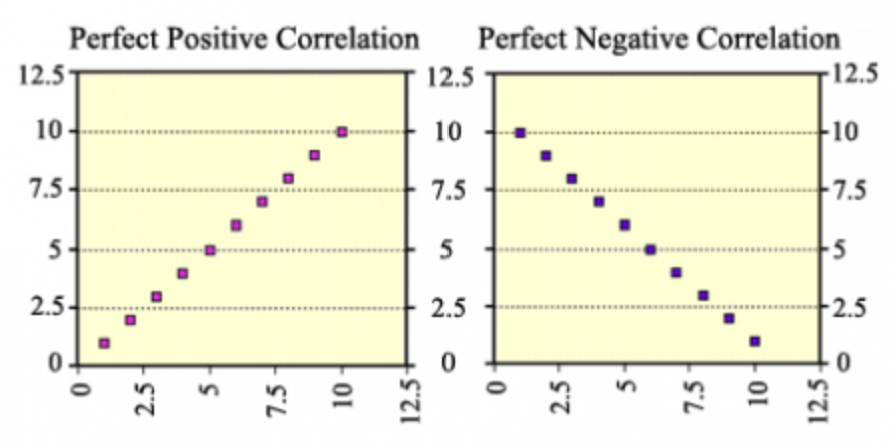

Reference image taken from https://texasgateway.org/resource/interpreting-scatterplots  specifically https://d1yqpar94jqbqm.cloudfront.net/styles/media_middle/s3/images/Capture_41.PNG?itok=s04c4ENp